In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch




In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map(dict(zip(range(3), iris.target_names)))

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Convert to DataFrame
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNet, self).__init__()
        # Better initialization: Xavier
        self.W1 = nn.Parameter(torch.empty(input_size, hidden_size))
        nn.init.xavier_uniform_(self.W1)
        self.b1 = nn.Parameter(torch.zeros(hidden_size))

        self.W2 = nn.Parameter(torch.empty(hidden_size, output_size))
        nn.init.xavier_uniform_(self.W2)
        self.b2 = nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        z1 = x @ self.W1 + self.b1
        a1 = F.relu(z1)  # or F.leaky_relu(z1, 0.01)
        z2 = a1 @ self.W2 + self.b2
        return z2  # raw logits


In [11]:
# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 32
output_size = 3
learning_rate = 0.01
epochs = 50

# Initialize model
model = TwoLayerNet(input_size, hidden_size, output_size)

# Loss function
criterion = nn.CrossEntropyLoss()

# Track accuracy for plotting
train_acc_list = []
test_acc_list = []

for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()

    # Update weights manually using SGD
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad


    model.zero_grad()

    # Train accuracy
    _, predicted_train = torch.max(outputs, 1)
    train_accuracy = (predicted_train == y_train).float().mean().item()

    # Test accuracy
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs, 1)
        test_accuracy = (predicted_test == y_test).float().mean().item()

    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, "
              f"Train Acc: {train_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

Epoch [10/50], Loss: 1.1523, Train Acc: 0.4500, Test Acc: 0.3667
Epoch [20/50], Loss: 1.0568, Train Acc: 0.4583, Test Acc: 0.3667
Epoch [30/50], Loss: 0.9755, Train Acc: 0.5000, Test Acc: 0.4333
Epoch [40/50], Loss: 0.9061, Train Acc: 0.8250, Test Acc: 0.7667
Epoch [50/50], Loss: 0.8460, Train Acc: 0.8167, Test Acc: 0.7667


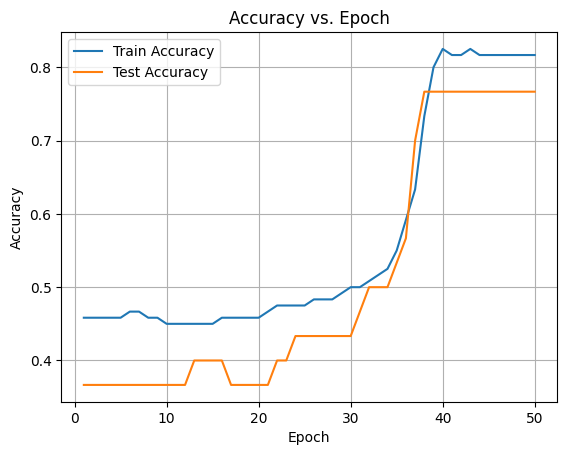

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs + 1), train_acc_list, label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
final_test_accuracy = test_acc_list[-1]
print(f"Final Test Accuracy: {final_test_accuracy * 100:.2f}%")


Final Test Accuracy: 76.67%
